# IES retention analysis

### Aim
Analyze genome-wide IES retention in ICOP knockdowns and compare them with the puplished data of the ISWI1 knockdown. New KDs analyzed in this notebook: ICOP1-KD, ICOP2-KD, ICOP1/2-KD, ND7-KD

### Input
new enriched MAC DNA was send for whole genome sequencing. In the PARTIES pipeline the MIRET module was run on the bowtie mapped .bam files. Output is a .gff3 from where the IRSs (IES retention scores) were extracted and added to other published IRSs in a .tab file.

### What this notebook does
1. Histogram of genome-wide IRS per IES (%)

In [1]:
#!/usr/bin/env python

import gzip
import matplotlib
from matplotlib import * 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pylab import * 
import numpy as np
from collections import OrderedDict

In [2]:
# store IRS of all KD in dictionary
kd_names = gzip.open('ICOP_IRS.tab.gz', mode='rt').readline().split()[1:]
kds = OrderedDict([(kd_name, []) for kd_name in kd_names])
kl = list(kds.keys())

for line in gzip.open('ICOP_IRS.tab.gz', mode='rt').readlines()[1:]:
    atoms = line.split()
    for i in range(1, len(atoms)):
        if atoms[i] != 'NA':
            kds[kl[i - 1]].append(float(atoms[i]))

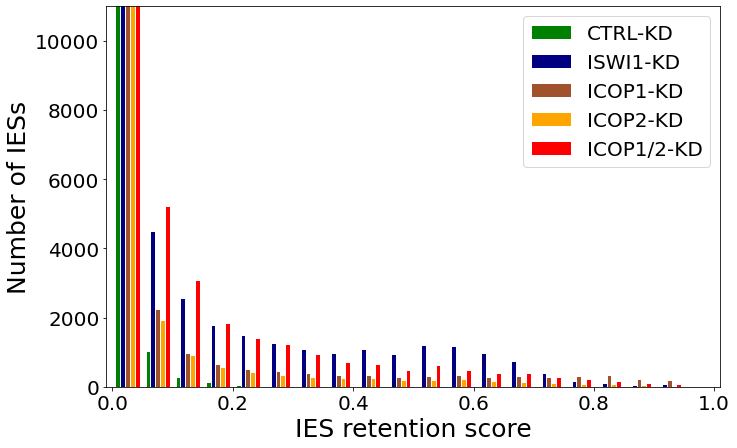

In [12]:
#plot the genome-wide IES retention score distribution (cropped)

# retrive data of interest from dictionary
kds_subset_ICOPiswi = { k : kds[k] for k in ['CTRL_ICOP','ISWI_b','ICOP1','ICOP2','ICOP1_2'] }
    
labels = ['CTRL-KD','ISWI1-KD','ICOP1-KD','ICOP2-KD','ICOP1/2-KD']

plt.figure(figsize=(11,7))
hist(kds_subset_ICOPiswi.values(), bins=np.arange(0, 1.0, 0.05), ec='white', log=False, 
     color=['green','navy','sienna','orange','red'],
     label=labels)
axis(ymax=11000, xmax=1.01, xmin=-0.01)
plt.ylabel("Number of IESs", wrap = True, fontsize = 25)
plt.xlabel("IES retention score", wrap = True, fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 20);


plt.savefig("ICOPs_ISWI_IRS.pdf", bbox_inches='tight')

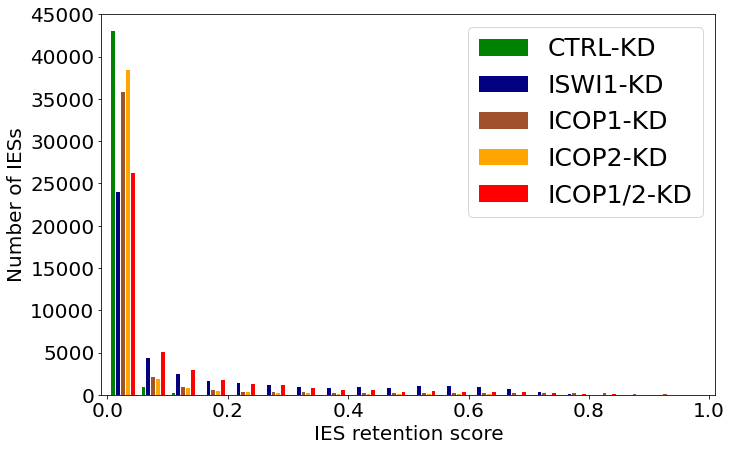

In [13]:
#plot the genome-wide IES retention score distribution (non-cropped)

plt.figure(figsize=(11,7))
hist(kds_subset_ICOPiswi.values(), bins=np.arange(0, 1.0, 0.05), ec='white', log=False, 
     color=['green','navy','sienna','orange','red'],
     label=labels)
axis(ymax=45000, xmax=1.01, xmin=-0.01)
plt.ylabel("Number of IESs", wrap = True, fontsize = 20)
plt.xlabel("IES retention score", wrap = True, fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);


plt.savefig("ICOPs_ISWI_IRS_s.pdf", bbox_inches='tight')